In [1]:
import sys        
import random
import warnings

import time
import numpy as np
import pandas as pd
import collections, functools, operator

sys.path.append('/Users/moises/Desktop/Produccion-Tesis')
from M2 import *

# Parameters of system
warnings.filterwarnings("ignore")

os.chdir('/Users/moises/Desktop/Produccion-Tesis')


In [2]:
escenario_A = 6
escenario_B = 12
q = 30000

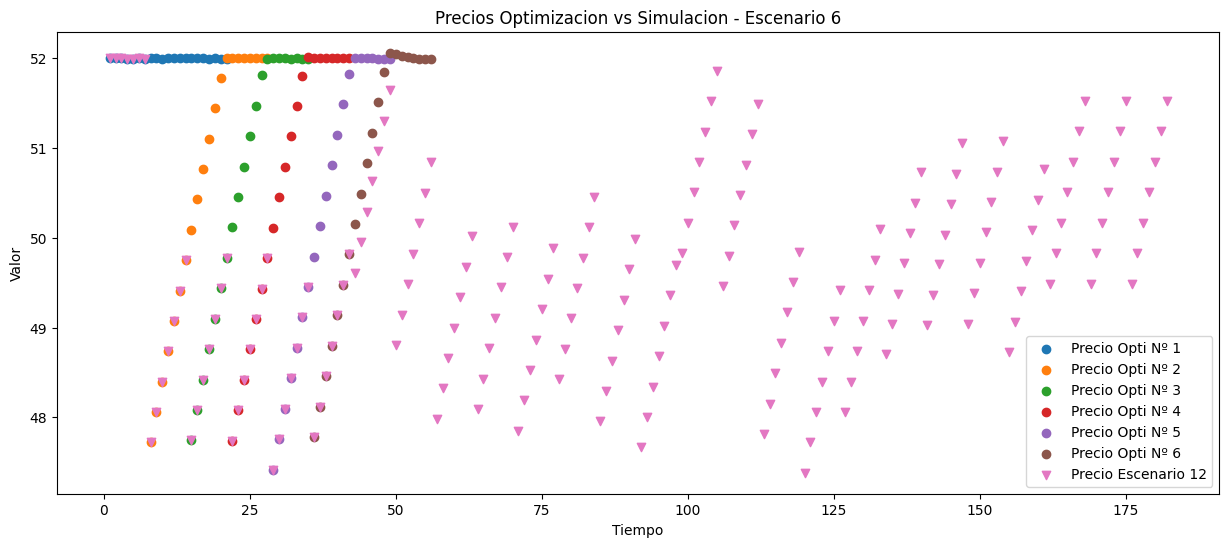

In [16]:
import pandas as pd

K, F, a = read_sheet(f"~/Desktop/Produccion-Tesis/Input/Constante.xlsx", "Patrones")

def generador_precios_opti(experiment=1):
        dictionary = {}
        P = pd.read_csv(f"~/Desktop/Produccion-Tesis/Resultados/{q}/Escenario {experiment}/P_opti.csv", sep=';')
        P = P[P.r == 1]
        P = P[P.f == 'Pechuga Completa']
        #P = P[['f', 't', 'n', 'r', 'value']]
        P = P[['t', 'r', 'n', 'value']]
        return P

def generador_precios(experiment):
    file_name = f"Resultados/{q}/Escenario {experiment}/"
    P = pd.read_csv(file_name+"P.csv", sep=';')
    P = P[P.f == 'Pechuga Completa']
    P = P[P.r == 1]
    return P

P = generador_precios(experiment=escenario_A)
P_1 = generador_precios(experiment=escenario_B)

P_opti = generador_precios_opti(experiment=escenario_A)
optimizaciones = P_opti.groupby('n')


plt.figure(figsize=(15,6))
plt.title(label=f'Precios Optimizacion vs Simulacion - Escenario {escenario_A}')

# Crear un gráfico para cada producto
for producto, datos_producto in optimizaciones:
        if producto in [1, 2, 3, 4, 5, 6]:
                plt.scatter(datos_producto['t'], datos_producto['value'], label=f"Precio Opti Nº {producto}")

plt.scatter(P.t, P.value, label=f"Precio Escenario {escenario_B}", marker='v')
#plt.scatter(P_1.t, P_1.value, label=f"Precio Escenario {escenario_B}", marker='v')

# Personalizar el gráfico
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()

# Mostrar el gráfico
plt.show()

In [ ]:
import pandas as pd

def generador_demanda_opti(replics=1):
        dictionary = {}
        P = pd.read_csv("~/Desktop/Produccion-Tesis/Resultados/{q}//Escenario 1/Prod_opti.csv")
        P['value'] = P['value']/replics

        P = P[P.f == 'Entero']
        P = P[['f', 't', 'n', 'r', 'value']]
        return P

def generador_demanda(experiment, replics=50):
    file_name = f"Resultados/Escenario {experiment}/"
    P = pd.read_csv(file_name+"Prod.csv")
    P = P[P.f == 'Entero']
    return P

Prod = generador_demanda(replics=1, experiment=1)

D_opti = generador_demanda_opti()
optimizaciones = D_opti.groupby('n')


plt.figure(figsize=(15,6))
plt.title(label='Produccion Optimizacion vs Simulacion')

# Crear un gráfico para cada producto
for producto, datos_producto in optimizaciones:
        plt.scatter(datos_producto['t'], datos_producto['value'], label=f"Produccion Opti Nº {producto}")
plt.scatter(D.t, D.value, label=f"Produccion Escenario {escenario_A}", marker='v')


# Personalizar el gráfico
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()

# Mostrar el gráfico
plt.show()

In [ ]:
import pandas as pd

def generador_demanda_opti(replics=1):
        dictionary = {}
        df = pd.read_csv("~/Desktop/Produccion-Tesis/Resultados/{q}//Escenario 1/D_opti.csv")
        df['value'] = df['value']/replics
        df = df[df.f == 'Entero']
        df = df[['f', 't', 'n', 'r', 'value']]
        return df

def generador_demanda(experiment, replics=50):
    file_name = f"Resultados/Escenario {experiment}/"
    df = pd.read_csv(file_name+"sales.csv")
    df = df[df.f == 'Entero']
    return df

V = generador_demanda(replics=1, experiment=1)

D_opti = generador_demanda_opti()
optimizaciones = D_opti.groupby('n')


plt.figure(figsize=(15,6))
plt.title(label='Ventas Optimizacion vs Simulacion')

# Crear un gráfico para cada producto
for producto, datos_producto in optimizaciones:
        plt.scatter(datos_producto['t'], datos_producto['value'], label=f"Ventas Opti Nº {producto}")
plt.scatter(D.t, D.value, label=f"Ventas Escenario {escenario_A}", marker='v')


# Personalizar el gráfico
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()

# Mostrar el gráfico
plt.show()

In [ ]:
import pandas as pd

def generador_demanda_opti(replics=1):
        dictionary = {}
        df = pd.read_csv("~/Desktop/Produccion-Tesis/Resultados/{q}//Escenario 1/D_opti.csv")
        df['value'] = df['value']/replics
        df = df[df.f == 'Entero']
        df = df[['f', 't', 'n', 'r', 'value']]
        return df

def generador_demanda(experiment, replics=50):
    file_name = f"Resultados/Escenario {experiment}/"
    df = pd.read_csv(file_name+"sales.csv")
    df = df[df.f == 'Entero']
    return df

D = generador_demanda(replics=1, experiment=1)

D_opti = generador_demanda_opti()
optimizaciones = D_opti.groupby('n')


plt.figure(figsize=(15,6))
plt.title(label='Ventas Optimizacion vs Simulacion')

# Crear un gráfico para cada producto
for producto, datos_producto in optimizaciones:
        plt.scatter(datos_producto['t'], datos_producto['value'], label=f"Ventas Opti Nº {producto}")
plt.scatter(D.t, D.value, label=f"Ventas Escenario {escenario_A}", marker='v')


# Personalizar el gráfico
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()

# Mostrar el gráfico
plt.show()

In [ ]:
import pandas as pd

def generador_inventario_opti():
        dictionary = {}
        df = pd.read_csv("~/Desktop/Produccion-Tesis/Resultados/{q}//Escenario 1/S_opti.csv")
        df = df[df.f == 'Entero']
        df = df.groupby(['f', 'n', 't', 'r']).sum().reset_index()
        df = df[['f', 't', 'n', 'r', 'value']]
        return df

def generador_inventario(experiment):
    file_name = f"Resultados/Escenario {experiment}/"
    df = pd.read_csv(file_name+"S_inicial.csv")
    df = df[df.f == 'Entero']
    return df

S = generador_inventario(experiment=1)
S_opti = generador_inventario_opti()
optimizaciones = D_opti.groupby('n')

plt.figure(figsize=(15,6))
plt.title(label='Inventario final Optimizacion vs Simulacion')

# Crear un gráfico para cada producto
for producto, datos_producto in optimizaciones:
        plt.scatter(datos_producto['t'], datos_producto['value'], label=f"Inventario final Opti Nº {producto}")
plt.scatter(D.t, D.value, label=f"Inventario final Escenario {escenario_A}", marker='v')


# Personalizar el gráfico
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()

# Mostrar el gráfico
plt.show()

In [ ]:
# Revision de Flujo de Materia
V.rename(columns={'value':'venta'}, inplace=True)
Prod.rename(columns={'value':'prod'}, inplace=True)
S.rename(columns={'value':'inv'}, inplace=True)
df = V.merge(Prod, on=['f', 't']).merge(S, on=['f', 't'])
df['dif'] = -df['venta']+df['prod']+df['inv']
df['dif'].describe()


In [50]:
q = 15000
replicas = 15
tiempo = 21

dictionary = {}
S0 = pd.read_csv(f"~/Desktop/Produccion-Tesis/Resultados/{q}/Warmup/S0.csv", sep=';').reset_index()
S0['value'] = S0['value']/replicas
S0 = S0[['f','u','r','value']].groupby(['f']).sum().reset_index()[['f','u','value']]
for _, value in S0.iterrows():
        dictionary[(value['f'], 1)] = round(value['value'])
dictionary


{'Ala Completa': 575,
 'Alón': 0,
 'Blanqueta': 0,
 'Cuarto de Pollo Superior': 794,
 'Entero': 590,
 'Jamoncito': 1134,
 'Media Pechuga': 1695,
 'Medio Muslo': 978,
 'Medio Pollo': 831,
 'Medio Pollo Inferior': 927,
 'Medio Pollo Superior': 991,
 'Muslo Entero': 1270,
 'Pechuga Completa': 914,
 'Punta': 0}